In [2]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem import PandasTools
from rdkit.Chem.Draw import IPythonConsole
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
import math

In [3]:
# load predicted values from the previous 6-fold cross-validation as df
m2v_ffnn_p_1 = pd.read_csv('/Users/jiayun/Documents/work/mol2vec/hansen_p_word2vec_ffnn_ds6_fold1_results.csv')
m2v_ffnn_p_2 = pd.read_csv('/Users/jiayun/Documents/work/mol2vec/hansen_p_word2vec_ffnn_ds5_fold2_results.csv')
m2v_ffnn_p_3 = pd.read_csv('/Users/jiayun/Documents/work/mol2vec/hansen_p_word2vec_ffnn_ds4_fold3_results.csv')
m2v_ffnn_p_4 = pd.read_csv('/Users/jiayun/Documents/work/mol2vec/hansen_p_word2vec_ffnn_ds3_fold4_results.csv')
m2v_ffnn_p_5 = pd.read_csv('/Users/jiayun/Documents/work/mol2vec/hansen_p_word2vec_ffnn_ds2_fold5_results.csv')
m2v_ffnn_p_6 = pd.read_csv('/Users/jiayun/Documents/work/mol2vec/hansen_p_word2vec_ffnn_ds1_fold6_results.csv')
# concat the data, rename columns (actual=experimentally determined value)
m2v_ffnn_p = pd.concat((m2v_ffnn_p_1, m2v_ffnn_p_2, m2v_ffnn_p_3, m2v_ffnn_p_4, m2v_ffnn_p_5, m2v_ffnn_p_6), axis=0)
m2v_ffnn_p = m2v_ffnn_p.rename({'3': 'SMILES', '4':'Mol_No', '5': 'actual', '6':'predict'}, axis='columns')

In [4]:
# MAE, AE and RMSE give an idea of the error distribution
print(mean_absolute_error(m2v_ffnn_p['actual'], m2v_ffnn_p['predict']))

#RMSEs
print(math.sqrt(mean_squared_error(m2v_ffnn_p['actual'], m2v_ffnn_p['predict'])))

# R^2 Coefficient of Determination
print(r2_score(m2v_ffnn_p['actual'], m2v_ffnn_p['predict']))

2.150879276866945
2.9313264143393676
0.5402449131295898


In [5]:
len(m2v_ffnn_p)

1183

In [6]:
# calculate the residual value for each molecule
m2v_ffnn_p['residual']= m2v_ffnn_p['predict']-m2v_ffnn_p['actual']

In [7]:
# calculate standardised deviation of the residuals (sdr) of the dataset
# equations used: sdr = sqrt((sum((residual)**2))/(n-2))
sdr = np.sqrt((m2v_ffnn_p['residual']**2).sum()/(len(m2v_ffnn_p)-2))
sdr

2.933807435870548

In [8]:
# calculate how many sdr each molecule's predicted value is away from the exp value 
m2v_ffnn_p['std_residual'] = m2v_ffnn_p['residual']/sdr
m2v_ffnn_p['std_residual']

0     -0.390659
1     -4.422935
2      0.884380
3      0.327989
4     -2.679453
         ...   
178    0.725545
179   -0.241376
180    1.708935
181    1.140972
182   -1.386430
Name: std_residual, Length: 1183, dtype: float64

In [9]:
gpHSP_data = pd.read_csv('/Users/jiayun/Documents/work/mol2vec/hansen_1k_smiles_shorter.csv')
mol_smiles = gpHSP_data['SMILES']
mol_number = gpHSP_data['number']
mol_name = gpHSP_data['Molecule']

def mapping(number):
#     print(row['number'])
    return gpHSP_data.loc[gpHSP_data['number'] == number]['SMILES'].iloc[0]

m2v_ffnn_p['SMILES'] = m2v_ffnn_p.apply(lambda row: mapping(row['number']), axis=1)

In [10]:
# n is 2 or 3. Points 2 or 3 sdr away from the prediction line are likely to be outliers
n = 3
m2v_ffnn_p_outliers = m2v_ffnn_p.loc[abs(m2v_ffnn_p['std_residual']) > n]
len(m2v_ffnn_p_outliers)

17

In [11]:
m2v_ffnn_p_outliers

,Unnamed: 0,number,actual,predict,SMILES,residual,std_residual
1,1,733,25.5,12.523959,OCC(O)CO.OC(O)=O,-12.976041,-4.422935
23,23,473,27.6,18.021420,[Ca++].NC#N,-9.578580,-3.264897
37,37,316,17.1,7.896966,O=C1C(=O)c2ccccc2c3ccccc13,-9.203034,-3.136891
89,89,725,26.2,16.976456,NC=O,-9.223544,-3.143882
162,162,1142,3.5,13.857572,Cc1ccc(c(c1[N+]([O-])=O)[N+]([O-])=O)[N+]([O-])=O,10.357572,3.530420
32,32,447,10.0,1.167905,[Cl],-8.832095,-3.010455
48,48,1109,18.8,9.094412,C/C=C/C#N,-9.705588,-3.308189
81,81,7,15.7,5.945735,CC(Cl)=C(Cl)Cl,-9.754265,-3.324780
109,109,763,17.6,7.171202,C#N,-10.428798,-3.554698
195,195,406,14.9,1.167905,[Br],-13.732095,-4.680639


In [12]:
m2v_ffnn_p_outliers.to_csv('m2v_ffnn_p_outliers3.csv')

In [13]:
# Set the default text font size
plt.rc('font', size=22)

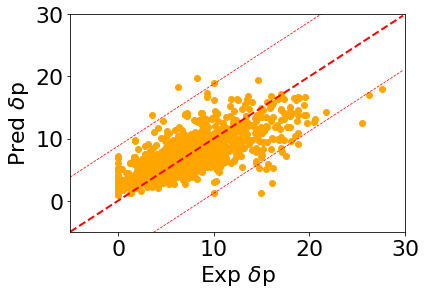

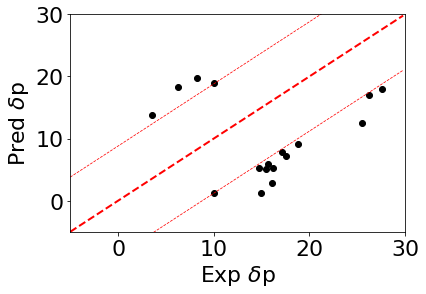

In [14]:
plt.figure(2)

# plot of exp vs pred of all molecules in the dataset
# The thick red lines indicate ideal agreement between the predicted and experimental values. 
# The dashed red lines indicate 3 srd (n=3) away from the ideal agreement. 
ln = np.arange(-5, 30, 0.2)
plt.plot(ln, ln,'r--', linewidth = '2')
plt.plot(ln, ln+n*sdr,'r--', linewidth = '0.75')
plt.plot(ln, ln-n*sdr,'r--', linewidth = '0.75')
plt.scatter(x=m2v_ffnn_p['actual'], y=m2v_ffnn_p['predict'], color='orange')
plt.xlabel('Exp $\delta$p')
plt.ylabel('Pred $\delta$p')
plt.xlim([-5,30])
plt.ylim([-5,30])
plt.show()

# Plot of the outliers identified 
# check visually to confirm they are on or beyond 3 srd
ln = np.arange(-5, 30, 0.2)
plt.plot(ln, ln,'r--', linewidth = '2')
plt.plot(ln, ln+n*sdr,'r--', linewidth = '0.75')
plt.plot(ln, ln-n*sdr,'r--', linewidth = '0.75')
plt.scatter(x=m2v_ffnn_p_outliers['actual'], y=m2v_ffnn_p_outliers['predict'], color='black')
plt.xlabel('Exp $\delta$p')
plt.ylabel('Pred $\delta$p')
plt.xlim([-5,30])
plt.ylim([-5,30])
plt.show()

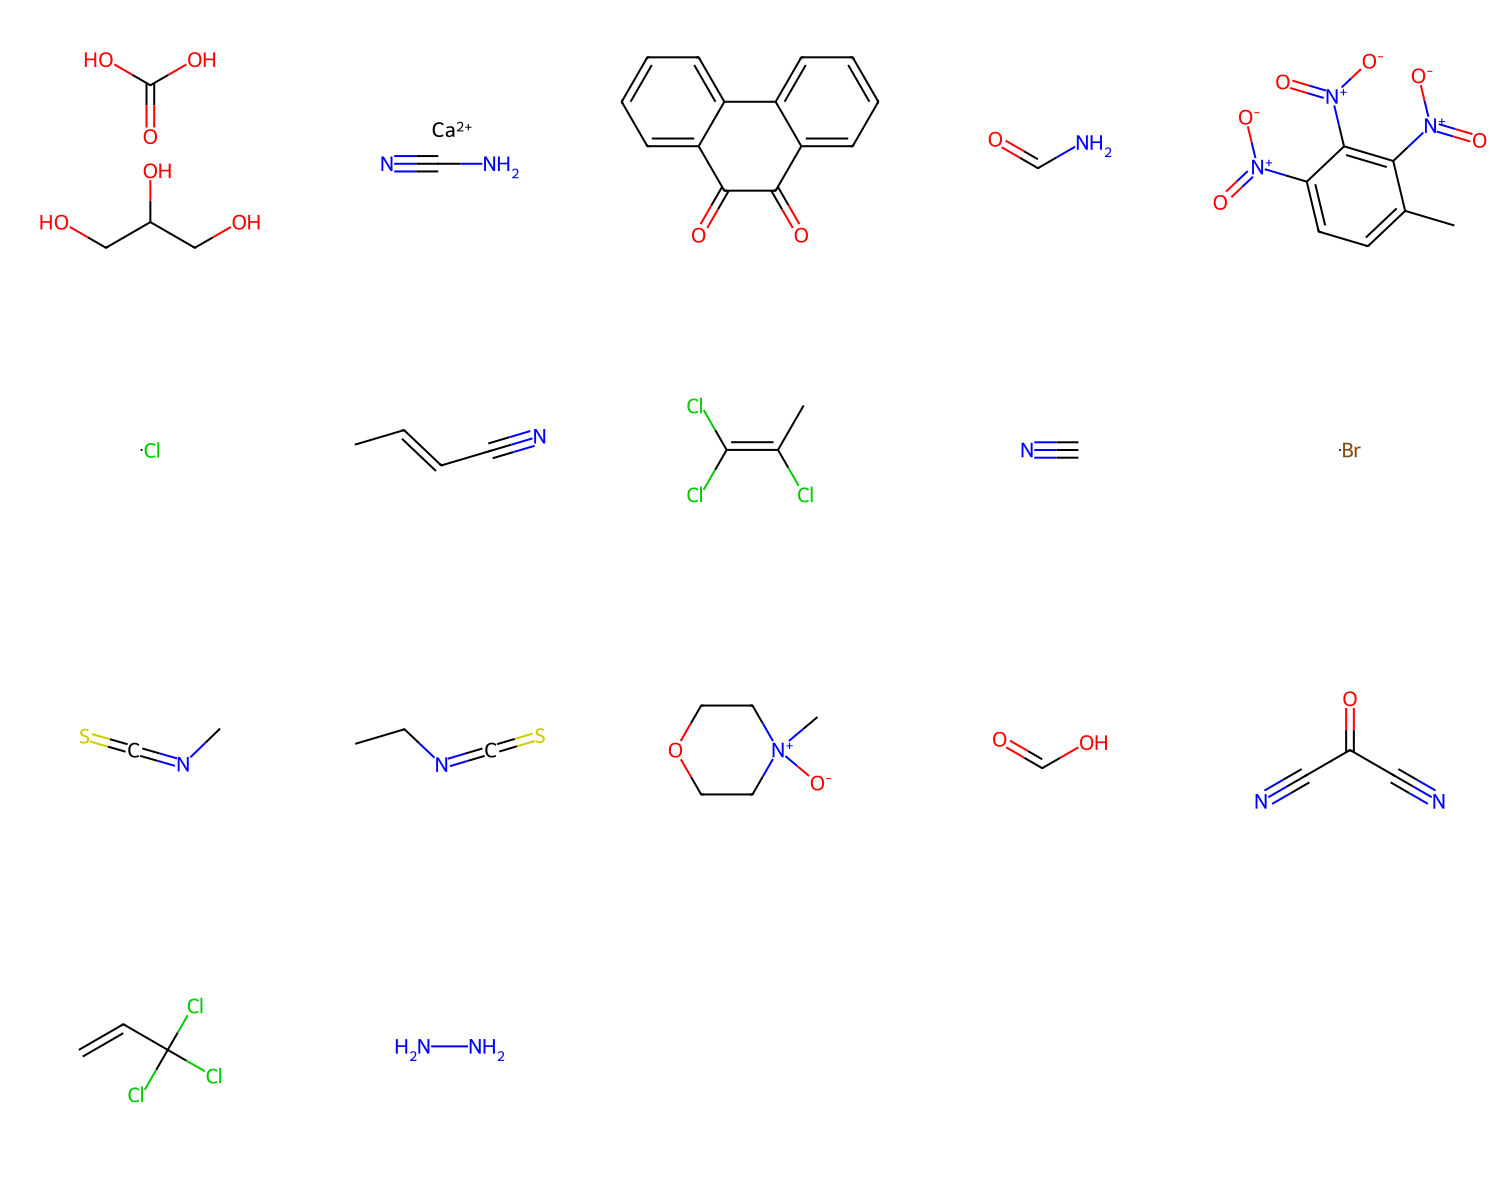

In [15]:
# draw n=3 outlier structure
outliners = [Chem.MolFromSmiles(x) for x in m2v_ffnn_p_outliers['SMILES']]
Draw.MolsToGridImage(outliners, subImgSize=(300,300), molsPerRow=5, maxMols=50)

In [16]:
# n is 2 or 3. Points 2 or 3 sdr away from the prediction line are likely to be outliers
n = 2
m2v_ffnn_p_outliers2 = m2v_ffnn_p.loc[abs(m2v_ffnn_p['std_residual']) > n]
len(m2v_ffnn_p_outliers2)

67

In [17]:
m2v_ffnn_p_outliers2

,Unnamed: 0,number,actual,predict,SMILES,residual,std_residual
1,1,733,25.5,12.523959,OCC(O)CO.OC(O)=O,-12.976041,-4.422935
4,4,381,14.9,7.039001,[nH]1cnc2ccccc12,-7.860999,-2.679453
9,9,283,16.1,10.098996,Nc1ccncc1,-6.001004,-2.045466
12,12,439,0.0,7.256447,S=C=S,7.256447,2.473389
23,23,473,27.6,18.021420,[Ca++].NC#N,-9.578580,-3.264897
...,...,...,...,...,...,...,...
64,64,830,7.0,13.903051,CN,6.903051,2.352933
65,65,762,8.3,19.824284,NN,11.524284,3.928098
127,127,417,14.4,6.413847,C1OC1C2CO2,-7.986153,-2.722112
166,166,751,0.0,6.850070,Fc1c(F)c(F)c(F)c(F)c1F,6.850070,2.334874


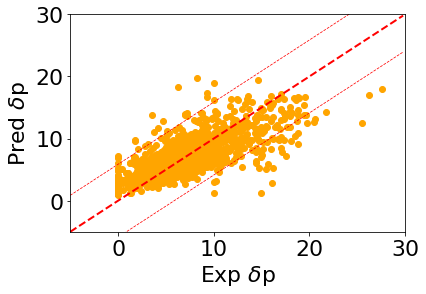

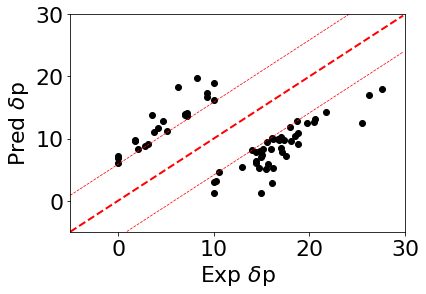

In [18]:
plt.figure(2)

# plot of exp vs pred of all molecules in the dataset
# The thick red lines indicate ideal agreement between the predicted and experimental values. 
# The dashed red lines indicate 2 srd (n=2) away from the ideal agreement. 
ln = np.arange(-5, 30, 0.2)
plt.plot(ln, ln,'r--', linewidth = '2')
plt.plot(ln, ln+n*sdr,'r--', linewidth = '0.75')
plt.plot(ln, ln-n*sdr,'r--', linewidth = '0.75')
plt.scatter(x=m2v_ffnn_p['actual'], y=m2v_ffnn_p['predict'], color='orange')
plt.xlabel('Exp $\delta$p')
plt.ylabel('Pred $\delta$p')
plt.xlim([-5,30])
plt.ylim([-5,30])
plt.show()

# Plot of the outliers identified 
# check visually to confirm they are on or beyond 2 srd
ln = np.arange(-5, 30, 0.2)
plt.plot(ln, ln,'r--', linewidth = '2')
plt.plot(ln, ln+n*sdr,'r--', linewidth = '0.75')
plt.plot(ln, ln-n*sdr,'r--', linewidth = '0.75')
plt.scatter(x=m2v_ffnn_p_outliers2['actual'], y=m2v_ffnn_p_outliers2['predict'], color='black')
plt.xlabel('Exp $\delta$p')
plt.ylabel('Pred $\delta$p')
plt.xlim([-5,30])
plt.ylim([-5,30])
plt.show()

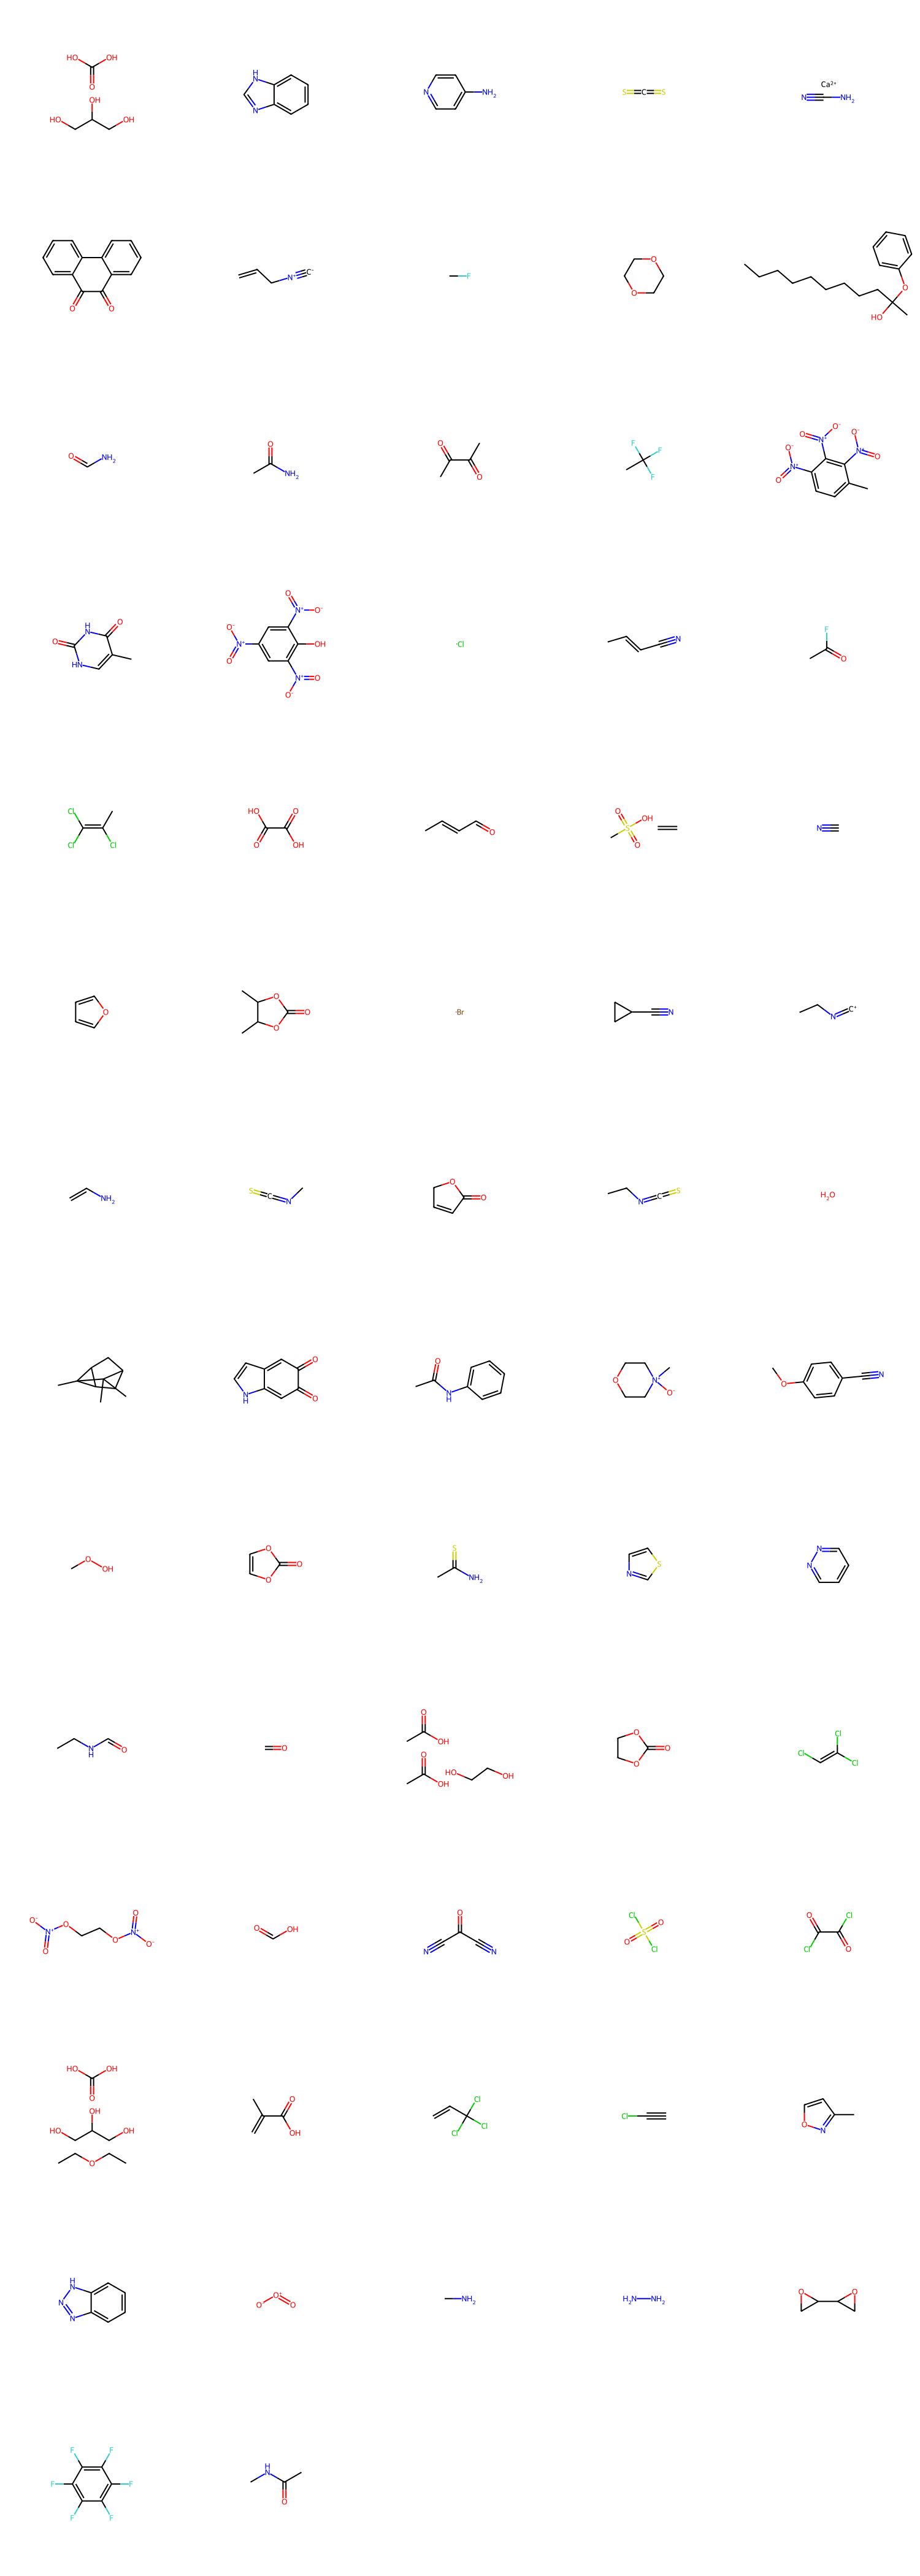

In [19]:
# draw n=2 outlier structure
outliners2 = [Chem.MolFromSmiles(x) for x in m2v_ffnn_p_outliers2['SMILES']]
Draw.MolsToGridImage(outliners2, subImgSize=(300,300), molsPerRow=5, maxMols=100)

In [20]:
# save outliers (n=2) info to a csv file
m2v_ffnn_p_outliers2.to_csv('m2v_ffnn_p_outliers2.csv')

In [21]:
from rdkit.Chem import Descriptors
gpHSP_data = pd.read_csv('/Users/jiayun/Documents/work/mol2vec/hansen_1k_smiles_shorter.csv')
mol_smiles = gpHSP_data['SMILES']

# calculate molecular weight of the full dataset
molwt = [(Descriptors.ExactMolWt(Chem.MolFromSmiles(x))) for x in gpHSP_data['SMILES']]
np_molwt = np.asarray(molwt)

# calculate molecular weight of outliers
molwt_outliers2 = [(Descriptors.ExactMolWt(Chem.MolFromSmiles(x))) for x in m2v_ffnn_p_outliers2['SMILES']]
np_molwt_outliers2 = np.asarray(molwt_outliers2)

# Compare average molecular weight for full data and outliers
print(np.average(np_molwt))
print(np.average(np_molwt_outliers2))

131.2953603288794
98.67856305325776


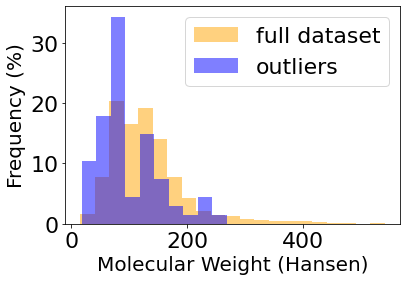

In [22]:
# plot molecular weight distribution for the full dataset and the outliers
bin_width = 25
df = pd.DataFrame(np_molwt, columns = ["full dataset"])
df2 = pd.DataFrame(np_molwt_outliers2, columns = ["outliers"])
ax = df.plot.hist(bins=(np.arange(min(molwt), max(molwt)+bin_width, bin_width)), alpha=0.5, color='orange', weights=np.ones_like(df.index) *100/ len(df))
df2.plot(kind='hist', bins=(np.arange(min(molwt_outliers2), max(molwt_outliers2)+bin_width, bin_width)), alpha=0.5, color='blue', weights=np.ones_like(df2.index) *100 /len(df2), ax=ax)
ax.set_xlabel("Molecular Weight (Hansen)", size=20)
ax.set_ylabel("Frequency (%)", size=20)
plt.show()